# **Assignment-2 for CS60075: Natural Language Processing**

#### Instructor : Prof. Sudeshna Sarkar

#### Teaching Assistants : Alapan Kuila, Aniruddha Roy, Prithwish Jana, Udit Dharmin Desai

#### Date of Announcement: 15th Sept, 2021
#### Deadline for Submission: 11.59pm on Wednesday, 22nd Sept, 2021 
#### Submit this .ipynb file, named as `<Your_Roll_Number>_Assn2_NLP_A21.ipynb`

The central idea of this assignment is to use Naive Bayes classifier and LSTM based classifier and compare the models by accuracy on IMDB dataset.  This dataset consists of 50k movie reviews (25k positive, 25k negative). You can download the dataset from https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews



Please submit with outputs. 

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# !unzip /content/gdrive/MyDrive/IIT/IMDB_Dataset.csv.zip -d /content/

Archive:  /content/gdrive/MyDrive/IIT/IMDB_Dataset.csv.zip
  inflating: /content/IMDB Dataset.csv  


In [ ]:
#Load the IMDB dataset. You can load it using pandas as dataframe

corpus = pd.read_csv('IMDB Dataset.csv', compression=None)

# Preprocessing
PrePrecessing that needs to be done on lower cased corpus

1. Remove html tags
2. Remove URLS
3. Remove non alphanumeric character
4. Remove Stopwords
5. Perform stemming and lemmatization

You can use regex from re. 

In [ ]:
# Lowercasing the reviews

corpus['review'] = corpus['review'].apply(lambda x: x.lower())

In [ ]:
corpus

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [ ]:
# Removing html tags

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

corpus['review'] = corpus['review'].apply(lambda x: cleanhtml(x))

In [ ]:
corpus

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [ ]:
# Removing URLs

def removeUrl(x):
    x = re.sub(r'http\S+', '', x)
    return x

corpus['review'] = corpus['review'].apply(lambda x: removeUrl(x))

In [ ]:
corpus

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [ ]:
# Removing non-alphanumeric characters

def removeNonAlpha(x):
    x = re.sub("\s+", " ", x)  # converting space-like character to single white space
    x = ''.join([y for y in x if y.isalnum() or y ==' '])
    return x

corpus['review'] = corpus['review'].apply(lambda x: removeNonAlpha(x))

In [ ]:
corpus

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [ ]:
# Removing stop-words

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

def removeStopWords(x):
    x = x.split()
    x = ' '.join([y for y in x if y not in stopWords])
    return x

corpus['review'] = corpus['review'].apply(lambda x: removeStopWords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,im going disagree previous comment side maltin...,negative


In [ ]:
# Performing stemming

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(x):
    x = x.split()
    x = ' '.join([stemmer.stem(y) for y in x])
    return x

corpus['review'] = corpus['review'].apply(lambda x: stemming(x))

In [ ]:
corpus

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job wasnt creativ orig...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,im go disagre previous comment side maltin one...,negative


In [ ]:
# Performing lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 

lemmatizer = WordNetLemmatizer()

def lemmatizing(x):
    x = x.split()
    x = ' '.join([lemmatizer.lemmatize(y) for y in x])
    return x

corpus['review'] = corpus['review'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
corpus

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job wasnt creativ orig...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,im go disagre previous comment side maltin one...,negative


In [ ]:
# Print Statistics of Data like avg length of sentence , proposition of data w.r.t class labels

sentenceCount = 0
tokenCount = 0

for sentence in corpus['review']:
    sentenceCount += 1
    tokenCount += len(sentence.split())

print(f'Average length of sentence is {tokenCount / sentenceCount}')

labelCount = dict()

for label in corpus['sentiment']:
    try:
        labelCount[label] += 1
    except KeyError:
        labelCount[label] = 1

print('\nProportion of data wrt class labels')
for key, value in labelCount.items():
    print(f'\tLabel: {key} - Proporation: {value / len(corpus)}')

Average length of sentence is 119.79486

Proportion of data wrt class labels
	Label: positive - Proporation: 0.5
	Label: negative - Proporation: 0.5


# Naive Bayes classifier

In [ ]:
# get reviews column from df
reviews = corpus['review']

# get labels column from df
labels =  corpus['sentiment']

In [ ]:
# Use label encoder to encode labels. Convert to 0/1
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
# Split the data into train and test (80% - 20%). 
# Use stratify in train_test_split so that both train and test have similar ratio of positive and negative samples.

# train_sentences, test_sentences, train_labels, test_labels

train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels,
                                                                              test_size=0.2,
                                                                              random_state=42,
                                                                              stratify=encoded_labels)

train_sentences = train_sentences.to_numpy().squeeze()
test_sentences = test_sentences.to_numpy().squeeze()

Here there are two approaches possible for building vocabulary for the naive Bayes.
1. Take the whole data (train + test) to build the vocab. In this way while testing there is no word which will be out of vocabulary.
2. Take the train data to build vocab. In this case, some words from the test set may not be in vocab and hence one needs to perform smoothing so that one the probability term is not zero.
 
You are supposed to go by the 2nd approach.
 
Also building vocab by taking all words in the train set is memory intensive, hence you are required to build vocab by choosing the top 2000 - 3000 frequent words in the training corpus.

> $ P(x_i | w_j) = \frac{ N_{x_i,w_j}\, +\, \alpha }{ N_{w_j}\, +\, \alpha*d} $


$N_{x_i,w_j}$ : Number of times feature $x_i$ appears in samples of class $w_j$

$N_{w_j}$ : Total count of features in class $w_j$

$\alpha$ : Parameter for additive smoothing. Here consider $\alpha$ = 1

$d$ : Dimentionality of the feature vector  $x = [x_1,x_2,...,x_d]$. In our case its the vocab size.






In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Use Count vectorizer to get frequency of the words
'''
max_features parameter : If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
vec = CountVectorizer(max_features = 3000)
X = vec.fit_transform(Sentence_list)
'''

vec = CountVectorizer(max_features=3000)
train_vectors = vec.fit_transform(train_sentences)
train_vectors = train_vectors.toarray()

In [ ]:
train_df = pd.DataFrame(train_vectors, columns=vec.get_feature_names())

In [ ]:
train_df

,10,100,1010,11,110,12,13,14,15,17,18,1930s,1950s,1960s,1970s,1980s,20,2000,2001,2005,2006,20th,25,30,40,410,45,50,60,70,710,80,810,90,abandon,abil,abl,abrupt,absolut,absurd,...,work,worker,world,worri,wors,worst,worth,worthi,worthwhil,would,wouldnt,wouldv,wound,wow,wrap,wreck,wrestl,write,writer,writerdirector,written,wrong,wrote,wwii,yeah,year,yell,yes,yet,york,youd,youll,young,younger,your,youth,youv,zero,zombi,zone
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from tqdm import tqdm

In [ ]:
# Build the model. Don't use the model from sklearn

countWC = [[0 for j in range(len(np.unique(train_labels)))] for i in range(train_vectors.shape[1])]
# countWC[i][j] = count of token i with class j

countC = [0 for j in range(len(np.unique(train_labels)))] # countC[i] = count of tokens in class i

with tqdm(total=train_vectors.shape[0]*train_vectors.shape[1]) as pbar:
    for i in range(train_vectors.shape[0]):
        for j in range(train_vectors.shape[1]):
            cls = train_labels[i]
            countWC[j][cls] += train_vectors[i][j]
            countC[cls] += train_vectors[i][j]
            pbar.update(1)

100%|██████████| 120000000/120000000 [04:46<00:00, 418410.35it/s]


In [ ]:
countC

[1941294, 1941182]

In [ ]:
len(vec.get_feature_names())

3000

In [ ]:
word_map = dict()

vocab = vec.get_feature_names()

for i in range(len(vocab)):
    word_map[vocab[i]] = i

In [ ]:
def score(text, label, alpha=1):
    words = text.split()
    res = 0
    for word in words:
        denominator = countC[label] + len(vocab) * alpha
        numerator = alpha
        if word in word_map.keys():
            numerator += countWC[word_map[word]][label]
        res += np.log(numerator / denominator)
    return res

In [ ]:
# Test the model on test set and report Accuracy

test_pred_labels = list()

for i in tqdm(range(len(test_sentences))):
    score_0 = score(test_sentences[i], 0)
    score_1 = score(test_sentences[i], 1)
    if score_0 > score_1:
        test_pred_labels.append(0)
    else:
        test_pred_labels.append(1)

print(f'\n{classification_report(test_labels, test_pred_labels, digits=3)}')

100%|██████████| 10000/10000 [00:08<00:00, 1239.67it/s]


              precision    recall  f1-score   support

           0      0.838     0.843     0.841      5000
           1      0.842     0.837     0.840      5000

    accuracy                          0.840     10000
   macro avg      0.840     0.840     0.840     10000
weighted avg      0.840     0.840     0.840     10000



# *LSTM* based Classifier

Use the above train and test splits.

In [ ]:
max_length_tr = 0
for x in train_sentences:
    length = len(x.split())
    max_length_tr = max(max_length_tr, length)
print(max_length_tr)

1429


In [ ]:
word_count_dis = [0] * (max_length_tr + 1)
for x in train_sentences:
    length = len(x.split())
    word_count_dis[length] += 1

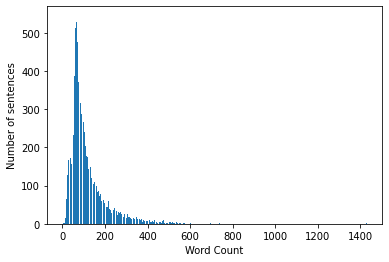

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(max_length_tr + 1)]

plt.bar(x, word_count_dis)
plt.xlabel('Word Count')
plt.ylabel('Number of sentences')
plt.show()

In [ ]:
# Hyperparameters of the model
vocab_size = len(vocab)
oov_tok = '<OOV>'
embedding_dim = 100
max_length = 200
padding_type='post'
trunc_type='post'

In [ ]:
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          300000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/5
1125/1125 [==============================] - 251s 220ms/step - loss: 0.4027 - accuracy: 0.8172 - val_loss: 0.2972 - val_accuracy: 0.8780
Epoch 2/5
1125/1125 [==============================] - 246s 219ms/step - loss: 0.2846 - accuracy: 0.8870 - val_loss: 0.3028 - val_accuracy: 0.8773
Epoch 3/5
1125/1125 [==============================] - 247s 220ms/step - loss: 0.2599 - accuracy: 0.8984 - val_loss: 0.2993 - val_accuracy: 0.8763
Epoch 4/5
1125/1125 [==============================] - 247s 219ms/step - loss: 0.2244 - accuracy: 0.9138 - val_loss: 0.3556 - val_accuracy: 0.8510
Epoch 5/5
1125/1125 [==============================] - 248s 220ms/step - loss: 0.1923 - accuracy: 0.9288 - val_loss: 0.3122 - val_accuracy: 0.8775


In [ ]:
prediction = model.predict(test_padded)

In [ ]:
# Calculate accuracy on Test data

# Get labels based on probability 1 if p>= 0.5 else 0

test_pred_labels = (prediction >= 0.5)

# Accuracy : one can use classification_report from sklearn
print(classification_report(test_labels, test_pred_labels, digits=3))

              precision    recall  f1-score   support

           0      0.877     0.871     0.874      5000
           1      0.872     0.877     0.875      5000

    accuracy                          0.874     10000
   macro avg      0.874     0.874     0.874     10000
weighted avg      0.874     0.874     0.874     10000



## Get predictions for random examples

In [ ]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this", 
            "the movie plot is terrible but it had good acting"]

def preprocess(text):
    text.lower()
    text = cleanhtml(text)
    text = removeUrl(text)
    text = removeNonAlpha(text)
    text = removeStopWords(text)
    text = stemming(text)
    text = lemmatizing(text)
    return text

sentence_preprocessed = list()

for x in sentence:
    sentence_preprocessed.append(preprocess(x))

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence_preprocessed)

# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)

# Get probabilities
prediction = model.predict(padded)

# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = (prediction >= 0.5)

print("Labels as per LSTM model\n")

for i in range(len(sentence)):
    print(f'Sentence: {sentence[i]}')
    print(f'Label: {"positive" if pred_labels[i] else "negative"} - Probability: {prediction[i][0]}')
    print()

print("\nLabels as per Naive Bayes model\n")

for i in range(len(sentence)):
    print(f'Sentence: {sentence[i]}')
    text = sentence_preprocessed[i]
    score_0 = score(text, 0)
    score_1 = score(text, 1)
    prob = np.exp(score_1) / (np.exp(score_0) + np.exp(score_1))
    if score_0 > score_1:
        print(f'Label: negative - Probability: {prob}\n')
    else:
        print(f'Label: positive - Probability: {prob}\n') 

Labels as per LSTM model

Sentence: The movie was very touching and heart whelming
Label: positive - Probability: 0.764784574508667

Sentence: I have never seen a terrible movie like this
Label: negative - Probability: 0.15747606754302979

Sentence: the movie plot is terrible but it had good acting
Label: negative - Probability: 0.07908380031585693


Labels as per Naive Bayes model

Sentence: The movie was very touching and heart whelming
Label: positive - Probability: 0.8184117221534074

Sentence: I have never seen a terrible movie like this
Label: negative - Probability: 0.10673086702202654

Sentence: the movie plot is terrible but it had good acting
Label: negative - Probability: 0.054063469276201606

